In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('weatherAUS.csv')

# Display first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
try:
    data = pd.read_csv('weatherAUS.csv')
except FileNotFoundError:
    print("Dataset file not found. Please check the file path.")
    raise

# Separate numeric and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill missing values for numerical columns
num_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

# Fill missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select features and target variable
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

print("Preprocessing completed successfully!")


Preprocessing completed successfully!


In [6]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are already defined as the features and target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.840815344424584
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.46      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



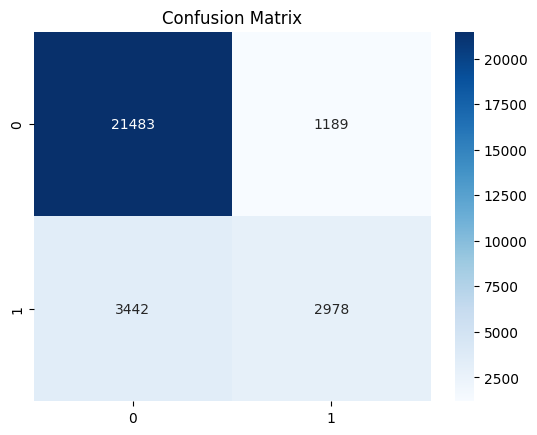

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [9]:
import pickle

# Save the model
with open('weather_forecast_model.pkl', 'wb') as f:  # Save as 'weather_forecast_model.pkl'
    pickle.dump(model, f)


In [10]:
with open('label_encoders.pkl', 'wb') as f:  # Save label encoders
    pickle.dump(label_encoders, f)

In [11]:
# Load the saved model
with open('weather_forecast_model.pkl', 'rb') as f:  # Load 'weather_forecast_model.pkl'
    model = pickle.load(f)

In [12]:
# Load the label encoders (if used)
with open('label_encoders.pkl', 'rb') as f:  # Load label encoders
    label_encoders = pickle.load(f)